# Table of Contents
 <p><div class="lev1"><a href="#Unicycle-Model"><span class="toc-item-num">1&nbsp;&nbsp;</span>Unicycle Model</a></div><div class="lev1"><a href="#Kinematic-bicycle-Model"><span class="toc-item-num">2&nbsp;&nbsp;</span>Kinematic bicycle Model</a></div><div class="lev1"><a href="#Dynamic-bicycle-Model"><span class="toc-item-num">3&nbsp;&nbsp;</span>Dynamic bicycle Model</a></div><div class="lev1"><a href="#linealize-Dynamic-Bicycle-Model-memo"><span class="toc-item-num">4&nbsp;&nbsp;</span>linealize Dynamic Bicycle Model memo</a></div>

# Unicycle Model

非常にシンプルなモデル。
シンプルだが、速度ベクトルが車両の進行方向と同じなので少し無理がある

$$
x_{k+1} = x_{k} + v_k cos(\phi_k)dt
$$
$$
y_{k+1} = y_{k} + v_k sin(\phi_k)dt
$$
$$
\phi_{k+1} = \phi_{k} + \frac{v_{k}}{L}tan(\delta_t)$$
$$
v_{k+1} = v_{k} + a_k dt \\
$$

# Kinematic bicycle Model
Unicycle Modelと比べて、車両のすべり角は考慮しているが、車輪のすべり角は考慮していない。
速度が15km/h以下の時には有効らしい (Parking などでは有効らしい)

\begin{align}
x_{k+1} &= x_{k} + v_k cos(\phi_k+\beta_k)dt \\
y_{k+1} &= y_{k} + v_k sin(\phi_k+\beta_k)dt\\
\phi_{k+1} &= \phi_{k} + \frac{v_{k}}{L_r}sin(\beta_t)\\
v_{k+1} &= v_{k} + a_k dt\\
\end{align}



# Dynamic bicycle Model
高速で走行するモデルには基本的にこれをつかう

\begin{align}
x_{k+1} &= x_{k} + v_k cos(\phi_k+\beta_k)dt \\
y_{k+1} &= y_{k} + v_k sin(\phi_k+\beta_k)dt\\
\phi_{k+1} &= \phi_{k} + \frac{v_{k}}{L_r}sin(\beta_t)\\
v_{k+1} &= v_{k} + a_k dt\\
\end{align}

# linealize Dynamic Bicycle Model memo

In [10]:
%matplotlib inline


In [12]:
import sympy
from sympy import init_printing
init_printing()

x,y,vx, vy, phi, a, d, cf, cr, m, Lf, Lr, w,Iz = sympy.symbols('x y vx vy phi a d cf cr m Lf Lr, w, Iz')
f = vx*sympy.cos(phi) - vy*sympy.sin(phi)
f

In [13]:
sympy.diff(f,x)

In [14]:
sympy.diff(f,y)

In [16]:
sympy.diff(f,phi)

In [17]:
sympy.diff(f,vy)

In [18]:
sympy.diff(f,vx)

In [19]:
f2 = vx*sympy.sin(phi) - vy*sympy.cos(phi)
print(f2)

vx*sin(phi) - vy*cos(phi)


In [20]:
sympy.diff(f2,phi)

In [28]:
fvx = a + sympy.sin(d) * cf / m * ((vy+Lf*w)/vx - d) + vy*w
fvx

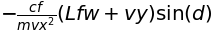

In [29]:
sympy.diff(fvx,vx)

In [30]:
sympy.diff(fvx,vy)

In [43]:
sympy.diff(fvx,w)

In [31]:
sympy.diff(fvx,x)

In [45]:
sympy.diff(fvx,d)

In [34]:
fvy = - cr / m * (vy-Lr*w)/vx + sympy.cos(d)/m*((vy+Lf*w)/vx - d) -vx*w
fvy

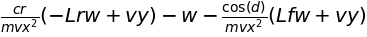

In [35]:
sympy.diff(fvy, vx)

In [36]:
sympy.diff(fvy, vy)

In [37]:
sympy.diff(fvy, w)

In [46]:
sympy.diff(fvy,d)

In [44]:
fw = -cf/Iz*((vy+Lf*w)/vx-d)*Lf*sympy.cos(d)+cr/Iz*(vy-Lr*w)/vx*Lr
fw

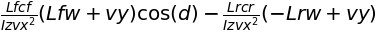

In [39]:
sympy.diff(fw,vx)

In [47]:
sympy.diff(fw,vy)

In [48]:
sympy.diff(fw,w)

In [49]:
sympy.diff(fw,d)